<a href="https://colab.research.google.com/github/thcesarc/UnivariateSimpleLinearRegression/blob/main/SimpleLinearRegression_hardImp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

###Loading, selecting and splitting dataset

In [3]:
#loading
full_dataset = pd.read_csv('Summary of Weather.csv', low_memory=False)

In [6]:
#selection filter: select all dataframe rows in which the 'STA' (station) feature column is equals to the paris station code (34022)
paris_filter = full_dataset['STA'] == 34022

In [8]:
minimum_temperatures = full_dataset[paris_filter].loc[:,'MinTemp'].values
maximum_temperatures = full_dataset[paris_filter].loc[:,'MaxTemp'].values

###The linear estimator 

In [14]:
 class LinearRegressor:
  '''generates a linear regression model based on x_set and y_set, 
     will find best values for w1 and w0 of: f(x) = w1x + w0 '''
  def __init__(self):
    self.w1 = None
    self.w0 = None
  def fit(self,x_set, y_set):
    '''find w0 and w1'''
    mean_x = x_set.mean()
    mean_y = y_set.mean()
    deviation_x = x_set - mean_x
    deviation_y = y_set - mean_y
    numerator   = sum(deviation_x * deviation_y)
    denominator = sum(np.square(deviation_x))
    self.w1 = numerator/denominator
    self.w0 = mean_y - self.w1 * mean_x
    return (self.w1, self.w0)
  def predict(self, x_set):
    return self.w1 * x_set + self.w0

###Create object and fitting data into model

In [22]:
estimator = LinearRegressor() 
w0,w1 = estimator.fit(minimum_temperatures, maximum_temperatures)
print('Coefficients:')
print('w0:',w0)
print('w1:',w1)

Coefficients:
w0: 1.2380910589984533
w1: 7.898361960134421


In [16]:
predicted = estimator.predict(minimum_temperatures)

###Computing the R² score

In [35]:
score = r2_score(maximum_temperatures, predicted)
print("{0:.2f}% of the data is well explained by the model.".format(score*100))

77.57% of the data is well explained by the model.


###Visualizing the data

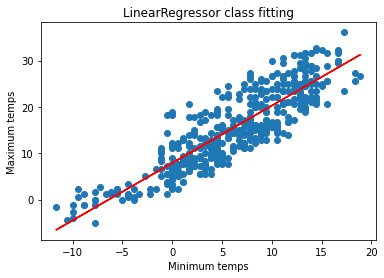

In [17]:
plt.scatter(minimum_temperatures, maximum_temperatures)
plt.plot(minimum_temperatures, predicted,color='red')
plt.title('LinearRegressor class fitting')
plt.xlabel('Minimum temps')
plt.ylabel('Maximum temps')
plt.show()
